In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats
from scipy.interpolate import CubicSpline


from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec
from IPython.display import display, Math
from sklearn.metrics import r2_score

from statistics import mean, median
from pylr2 import regress2


In [2]:
df_doc = pd.read_csv('../Fellowships/IRL_GRF/IRL_2024/Data/TOC_DATA.csv', sep=',', index_col=0)
df_ncs = pd.read_csv('../Fellowships/IRL_GRF/IRL_2024/Data/NCS_data.csv', sep=',', index_col=0)

df_doc

,Treatment,Campaign,Date,Location,Depth,NPOC Conc (mg/L),TN Conc (mg/L),NPOC_uM,TN_uM
Sample ID,,,,,,,,,
233600,P1F,IRL,10/11/2023,SF2,Ponar,3.581843,0.297010,298.486905,21.215026
233600,P6F,IRL,10/11/2023,SF2,Ponar,2.628514,0.231311,219.042857,16.522245
233601,P1F,IRL,10/11/2023,SF-1.2,Ponar,1.955989,0.110554,162.999107,7.896684
233601,P6F,IRL,10/11/2023,SF-1.2,Ponar,1.497982,0.096589,124.831845,6.899232
233602,P1F,IRL,10/11/2023,SF-1.1,Ponar,2.208118,0.225511,184.009821,16.107934
233602,P6F,IRL,10/11/2023,SF-1.1,Ponar,1.835454,0.180649,152.954464,12.903520
233603,P1F,IRL,10/11/2023,SF,Ponar,2.935036,0.468488,244.586309,33.463393
233603,P6F,IRL,10/11/2023,SF,Ponar,3.432693,0.605684,286.057738,43.263112
240120,P2F,IRL,5/15/2024,muddy core,0.5,17.422500,2.690250,1451.875000,105.716302


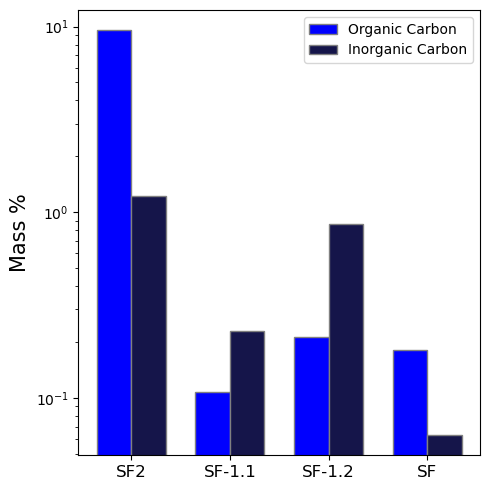

In [3]:
categories = ['SF2', 'SF-1.1', 'SF-1.2', 'SF']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2, ymax):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df[x_col].isin(categories)]
    df = df.set_index(x_col)  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(5, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper right')
    #ax.set_ylim(0, ymax)  # Adjust y-limit based on max values

    ax.set_yscale('log') 

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Fellowships/IRL_GRF/IRL_2024/Figs/bar_plot_SF_OC_IC.png')
    plt.show()

ylabel = r'Solid Phase Carbon'
data_f = df_ncs
x_col = 'Station'
y_col1 = 'OC%'
y_col2 = 'IC%'
ylabels = 'Mass %'
title = ''
save_name = ''
y_col_lab1 = 'Organic Carbon'
y_col_lab2 = 'Inorganic Carbon'
color1 = 'blue'
color2 = '#15154a'
ymax = 10


# List of datasets to plot
bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2, ymax)

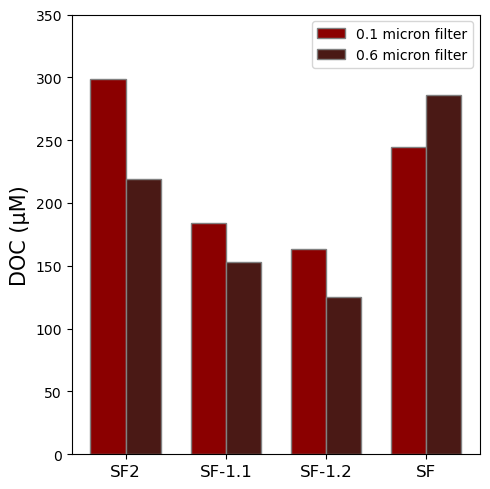

In [4]:
categories = ['SF2', 'SF-1.1', 'SF-1.2', 'SF']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2, ymax):
    df = data_f.copy()
    df1 = df[df['Treatment'] == 'P1F']
    df6 = df[df['Treatment'] == 'P6F']

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df1 = df1[df1[x_col].isin(categories)]
    df1 = df1.set_index(x_col)  # Set the index to 'Stn' for reindexing
    df1 = df1.reindex(categories)  # Reindex to include all categories
    df1.fillna(0, inplace=True)  # Fill missing values with zero

    df6 = df6[df6[x_col].isin(categories)]
    df6 = df6.set_index(x_col)  # Set the index to 'Stn' for reindexing
    df6 = df6.reindex(categories)  # Reindex to include all categories
    df6.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df1))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    r = np.arange(len(df6))  # The location for the groups
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(5, 5))

    # Plot the bars
    ax.bar(positions1, df1[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df6[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper right')
    ax.set_ylim(0, ymax)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Fellowships/IRL_GRF/IRL_2024/Figs/bar_plot_SF_DOC.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'DOC'
data_f = df_doc
x_col = 'Location'
y_col1 = 'NPOC_uM'
y_col2 = 'NPOC_uM'
ylabels = 'DOC (\u03BCM)'
title = ''
save_name = ''
y_col_lab1 = '0.1 micron filter'
y_col_lab2 = '0.6 micron filter'
color1 = 'darkred'
color2 = '#4a1915'
ymax = 350
bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2, ymax)

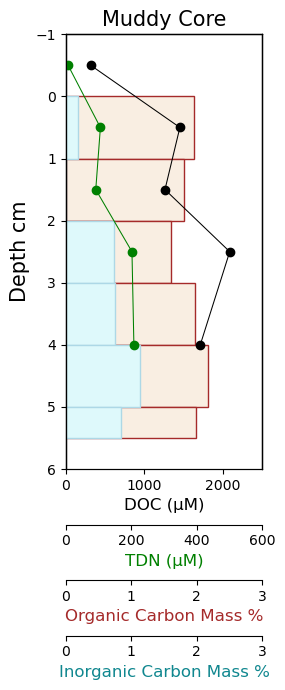

In [5]:
fig, ax = plt.subplots(1,1, figsize=(3, 7))

loc = 'muddy core'
stn = 'muddy'

data_doc_pw = df_doc[df_doc['Location'] == loc]
data_ncs = df_ncs[df_ncs['Station'] == stn]

data_doc_pw = data_doc_pw.sort_values(by='Depth', ascending=True, inplace=False)

#get vars DOC 
doc_uM_pw = data_doc_pw['NPOC_uM'] 
doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
tn_uM_pw = data_doc_pw['TN_uM'] 
tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
doc_depth_pw = data_doc_pw['Depth'] #X var 
doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()


oc = data_ncs['TC%']
oc = np.asarray(oc, dtype=float).ravel()
ic = data_ncs['IC%']
ic = np.asarray(ic, dtype=float).ravel()
n = data_ncs['TN%']
n = np.asarray(n, dtype=float).ravel()
depth_om = data_ncs['Depth_CM']
depth_om = np.asarray(depth_om, dtype=float).ravel()

ax.plot(doc_uM_pw, doc_depth_pw, c = 'white', lw = 1)
ax.set_ylim(6, -1)
ax.set_xlim(0, 1500)

bar_widths = np.diff(depth_om, append=depth_om[-1])

# Calculate the bounds for the bars
lower_bounds = np.zeros(len(depth_om))
upper_bounds = np.zeros(len(depth_om))

lower_bounds[0] = 0
for k in range(1, len(depth_om)):
    lower_bounds[k] = (depth_om[k-1] + depth_om[k]) / 2
    upper_bounds[:-1] = lower_bounds[1:]
    upper_bounds[-1] = depth_om[-1]
    
ax5 = ax.twiny()
for l in range(len(depth_om)):
    lower = lower_bounds[l]
    upper = upper_bounds[l]
    center = (lower + upper) / 2
    height = upper - lower
    ax5.barh(center, oc[l], color='#F9EEE2', edgecolor='brown', linewidth = 1, height=height, alpha=1)
ax5.set_ylim(6, -1)
ax5.set_xlim(0, 3)

ax6 = ax.twiny()
for l in range(len(depth_om)):
    lower = lower_bounds[l]
    upper = upper_bounds[l]
    center = (lower + upper) / 2
    height = upper - lower
    ax6.barh(center, ic[l], color='#def9fb', edgecolor='lightblue', linewidth = 1, height=height, alpha=1)
ax6.set_ylim(6, -1)
ax6.set_xlim(0, 3)

ax4 = ax.twiny()
ax4.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .75, marker='o')
ax4.set_ylim(6, -1)
ax4.set_xlim(0, 2500)

ax3 = ax.twiny()
ax3.plot(tn_uM_pw, doc_depth_pw, c = 'g', lw = .75, marker='o')
ax3.set_ylim(6, -1)
ax3.set_xlim(0, 600)

sz = 12

ax.set_ylabel('Depth cm', size=15, c='black')
ax.xaxis.set_ticklabels([])
ax.set_xticks([])

ax4.set_xlabel('DOC (\u03BCM)', size=sz, c='black')
ax4.xaxis.set_ticks_position('bottom')
ax4.xaxis.set_label_position('bottom')
ax4.xaxis.set_tick_params(labelsize=10)

ax3.set_xlabel('TDN (\u03BCM)', size = sz, c= 'g')
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 40))

ax5.set_xlabel(r'Organic Carbon Mass %', size = sz, c= 'brown')
ax5.xaxis.set_ticks_position('bottom')
ax5.xaxis.set_label_position('bottom')
ax5.spines['bottom'].set_position(('outward', 80))

ax6.set_xlabel(r'Inorganic Carbon Mass %', size = sz, c= '#10878f')
ax6.xaxis.set_ticks_position('bottom')
ax6.xaxis.set_label_position('bottom')
ax6.spines['bottom'].set_position(('outward', 120))
            
ax.set_title(f'Muddy Core', size=15)

            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Fellowships/IRL_GRF/IRL_2024/Figs/profile_Muddy_core.png')
plt.show()

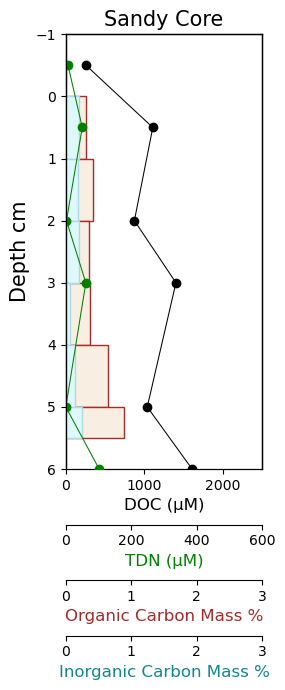

In [6]:
fig, ax = plt.subplots(1,1, figsize=(3, 7))

loc = 'sandy core'
stn = 'sandy'

data_doc_pw = df_doc[df_doc['Location'] == loc]
data_ncs = df_ncs[df_ncs['Station'] == stn]

data_doc_pw = data_doc_pw.sort_values(by='Depth', ascending=True, inplace=False)

#get vars DOC 
doc_uM_pw = data_doc_pw['NPOC_uM'] 
doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
tn_uM_pw = data_doc_pw['TN_uM'] 
tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
doc_depth_pw = data_doc_pw['Depth'] #X var 
doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()


oc = data_ncs['TC%']
oc = np.asarray(oc, dtype=float).ravel()
ic = data_ncs['IC%']
ic = np.asarray(ic, dtype=float).ravel()
n = data_ncs['TN%']
n = np.asarray(n, dtype=float).ravel()
depth_om = data_ncs['Depth_CM']
depth_om = np.asarray(depth_om, dtype=float).ravel()

ax.plot(doc_uM_pw, doc_depth_pw, c = 'white', lw = 1)
ax.set_ylim(6, -1)
ax.set_xlim(0, 1500)

bar_widths = np.diff(depth_om, append=depth_om[-1])

# Calculate the bounds for the bars
lower_bounds = np.zeros(len(depth_om))
upper_bounds = np.zeros(len(depth_om))

lower_bounds[0] = 0
for k in range(1, len(depth_om)):
    lower_bounds[k] = (depth_om[k-1] + depth_om[k]) / 2
    upper_bounds[:-1] = lower_bounds[1:]
    upper_bounds[-1] = depth_om[-1]
    
ax5 = ax.twiny()
for l in range(len(depth_om)):
    lower = lower_bounds[l]
    upper = upper_bounds[l]
    center = (lower + upper) / 2
    height = upper - lower
    ax5.barh(center, oc[l], color='#F9EEE2', edgecolor='brown', linewidth = 1, height=height, alpha=1)
ax5.set_ylim(6, -1)
ax5.set_xlim(0, 3)

ax6 = ax.twiny()
for l in range(len(depth_om)):
    lower = lower_bounds[l]
    upper = upper_bounds[l]
    center = (lower + upper) / 2
    height = upper - lower
    ax6.barh(center, ic[l], color='#def9fb', edgecolor='lightblue', linewidth = 1, height=height, alpha=1)
ax6.set_ylim(6, -1)
ax6.set_xlim(0, 3)

ax4 = ax.twiny()
ax4.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .75, marker='o')
ax4.set_ylim(6, -1)
ax4.set_xlim(0, 2500)

ax3 = ax.twiny()
ax3.plot(tn_uM_pw, doc_depth_pw, c = 'g', lw = .75, marker='o')
ax3.set_ylim(6, -1)
ax3.set_xlim(0, 600)

sz = 12

ax.set_ylabel('Depth cm', size=15, c='black')
ax.xaxis.set_ticklabels([])
ax.set_xticks([])

ax4.set_xlabel('DOC (\u03BCM)', size=sz, c='black')
ax4.xaxis.set_ticks_position('bottom')
ax4.xaxis.set_label_position('bottom')
ax4.xaxis.set_tick_params(labelsize=10)

ax3.set_xlabel('TDN (\u03BCM)', size = sz, c= 'g')
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 40))

ax5.set_xlabel(r'Organic Carbon Mass %', size = sz, c= 'brown')
ax5.xaxis.set_ticks_position('bottom')
ax5.xaxis.set_label_position('bottom')
ax5.spines['bottom'].set_position(('outward', 80))

ax6.set_xlabel(r'Inorganic Carbon Mass %', size = sz, c= '#10878f')
ax6.xaxis.set_ticks_position('bottom')
ax6.xaxis.set_label_position('bottom')
ax6.spines['bottom'].set_position(('outward', 120))
            
ax.set_title(f'Sandy Core', size=15)

            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Fellowships/IRL_GRF/IRL_2024/Figs/profile_Sandy_core.png')
plt.show()